In [1]:
from google.colab import files
uploaded = files.upload()

Saving Healthcare_dataset.xlsx to Healthcare_dataset.xlsx


In [2]:
import pandas as pd
data= pd.read_excel('Healthcare_dataset.xlsx')

In [3]:
data

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,Y,N,N,N,N,N,N,N,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3419,P3420,Persistent,Female,Caucasian,Not Hispanic,South,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,Y,N,N,N,N,N,N,1
3420,P3421,Persistent,Female,Caucasian,Not Hispanic,South,>75,Unknown,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
3421,P3422,Persistent,Female,Caucasian,Not Hispanic,South,>75,ENDOCRINOLOGY,Specialist,Endo/Onc/Uro,...,N,N,Y,N,N,N,N,N,N,1
3422,P3423,Non-Persistent,Female,Caucasian,Not Hispanic,South,55-65,Unknown,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0


# **data understanding**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 69 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   Ptid                                                                3424 non-null   object
 1   Persistency_Flag                                                    3424 non-null   object
 2   Gender                                                              3424 non-null   object
 3   Race                                                                3424 non-null   object
 4   Ethnicity                                                           3424 non-null   object
 5   Region                                                              3424 non-null   object
 6   Age_Bucket                                                          3424 non-null   object
 7   Ntm_Speciality          

In [5]:
print(data.shape)


(3424, 69)


Get summary statistics for the numerical columns



In [6]:
import numpy as np
data.describe(include=[np.number]).T


,count,mean,std,min,25%,50%,75%,max
Dexa_Freq_During_Rx,3424.0,3.016063,8.136545,0.0,0.0,0.0,3.0,146.0
Count_Of_Risks,3424.0,1.239486,1.094914,0.0,0.0,1.0,2.0,7.0


Get summary statistics for the object and categorical columns



In [7]:
data.describe(include=[np.object, pd.Categorical]).T


<ipython-input-7-0cf5f55b345d>:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data.describe(include=[np.object, pd.Categorical]).T


,count,unique,top,freq
Ptid,3424,3424,P1,1
Persistency_Flag,3424,2,Non-Persistent,2135
Gender,3424,2,Female,3230
Race,3424,4,Caucasian,3148
Ethnicity,3424,3,Not Hispanic,3235
...,...,...,...,...
Risk_Excessive_Thinness,3424,2,N,3357
Risk_Hysterectomy_Oophorectomy,3424,2,N,3370
Risk_Estrogen_Deficiency,3424,2,N,3413
Risk_Immobilization,3424,2,N,3410


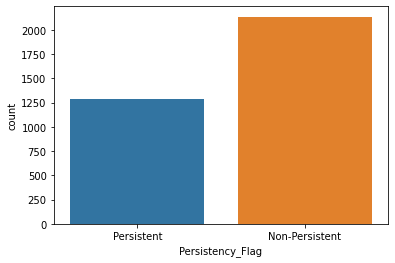

In [8]:
import seaborn as sns
sns.countplot(x="Persistency_Flag",data=data, dodge=True)

representation of the relation between each class and the persistent of patient

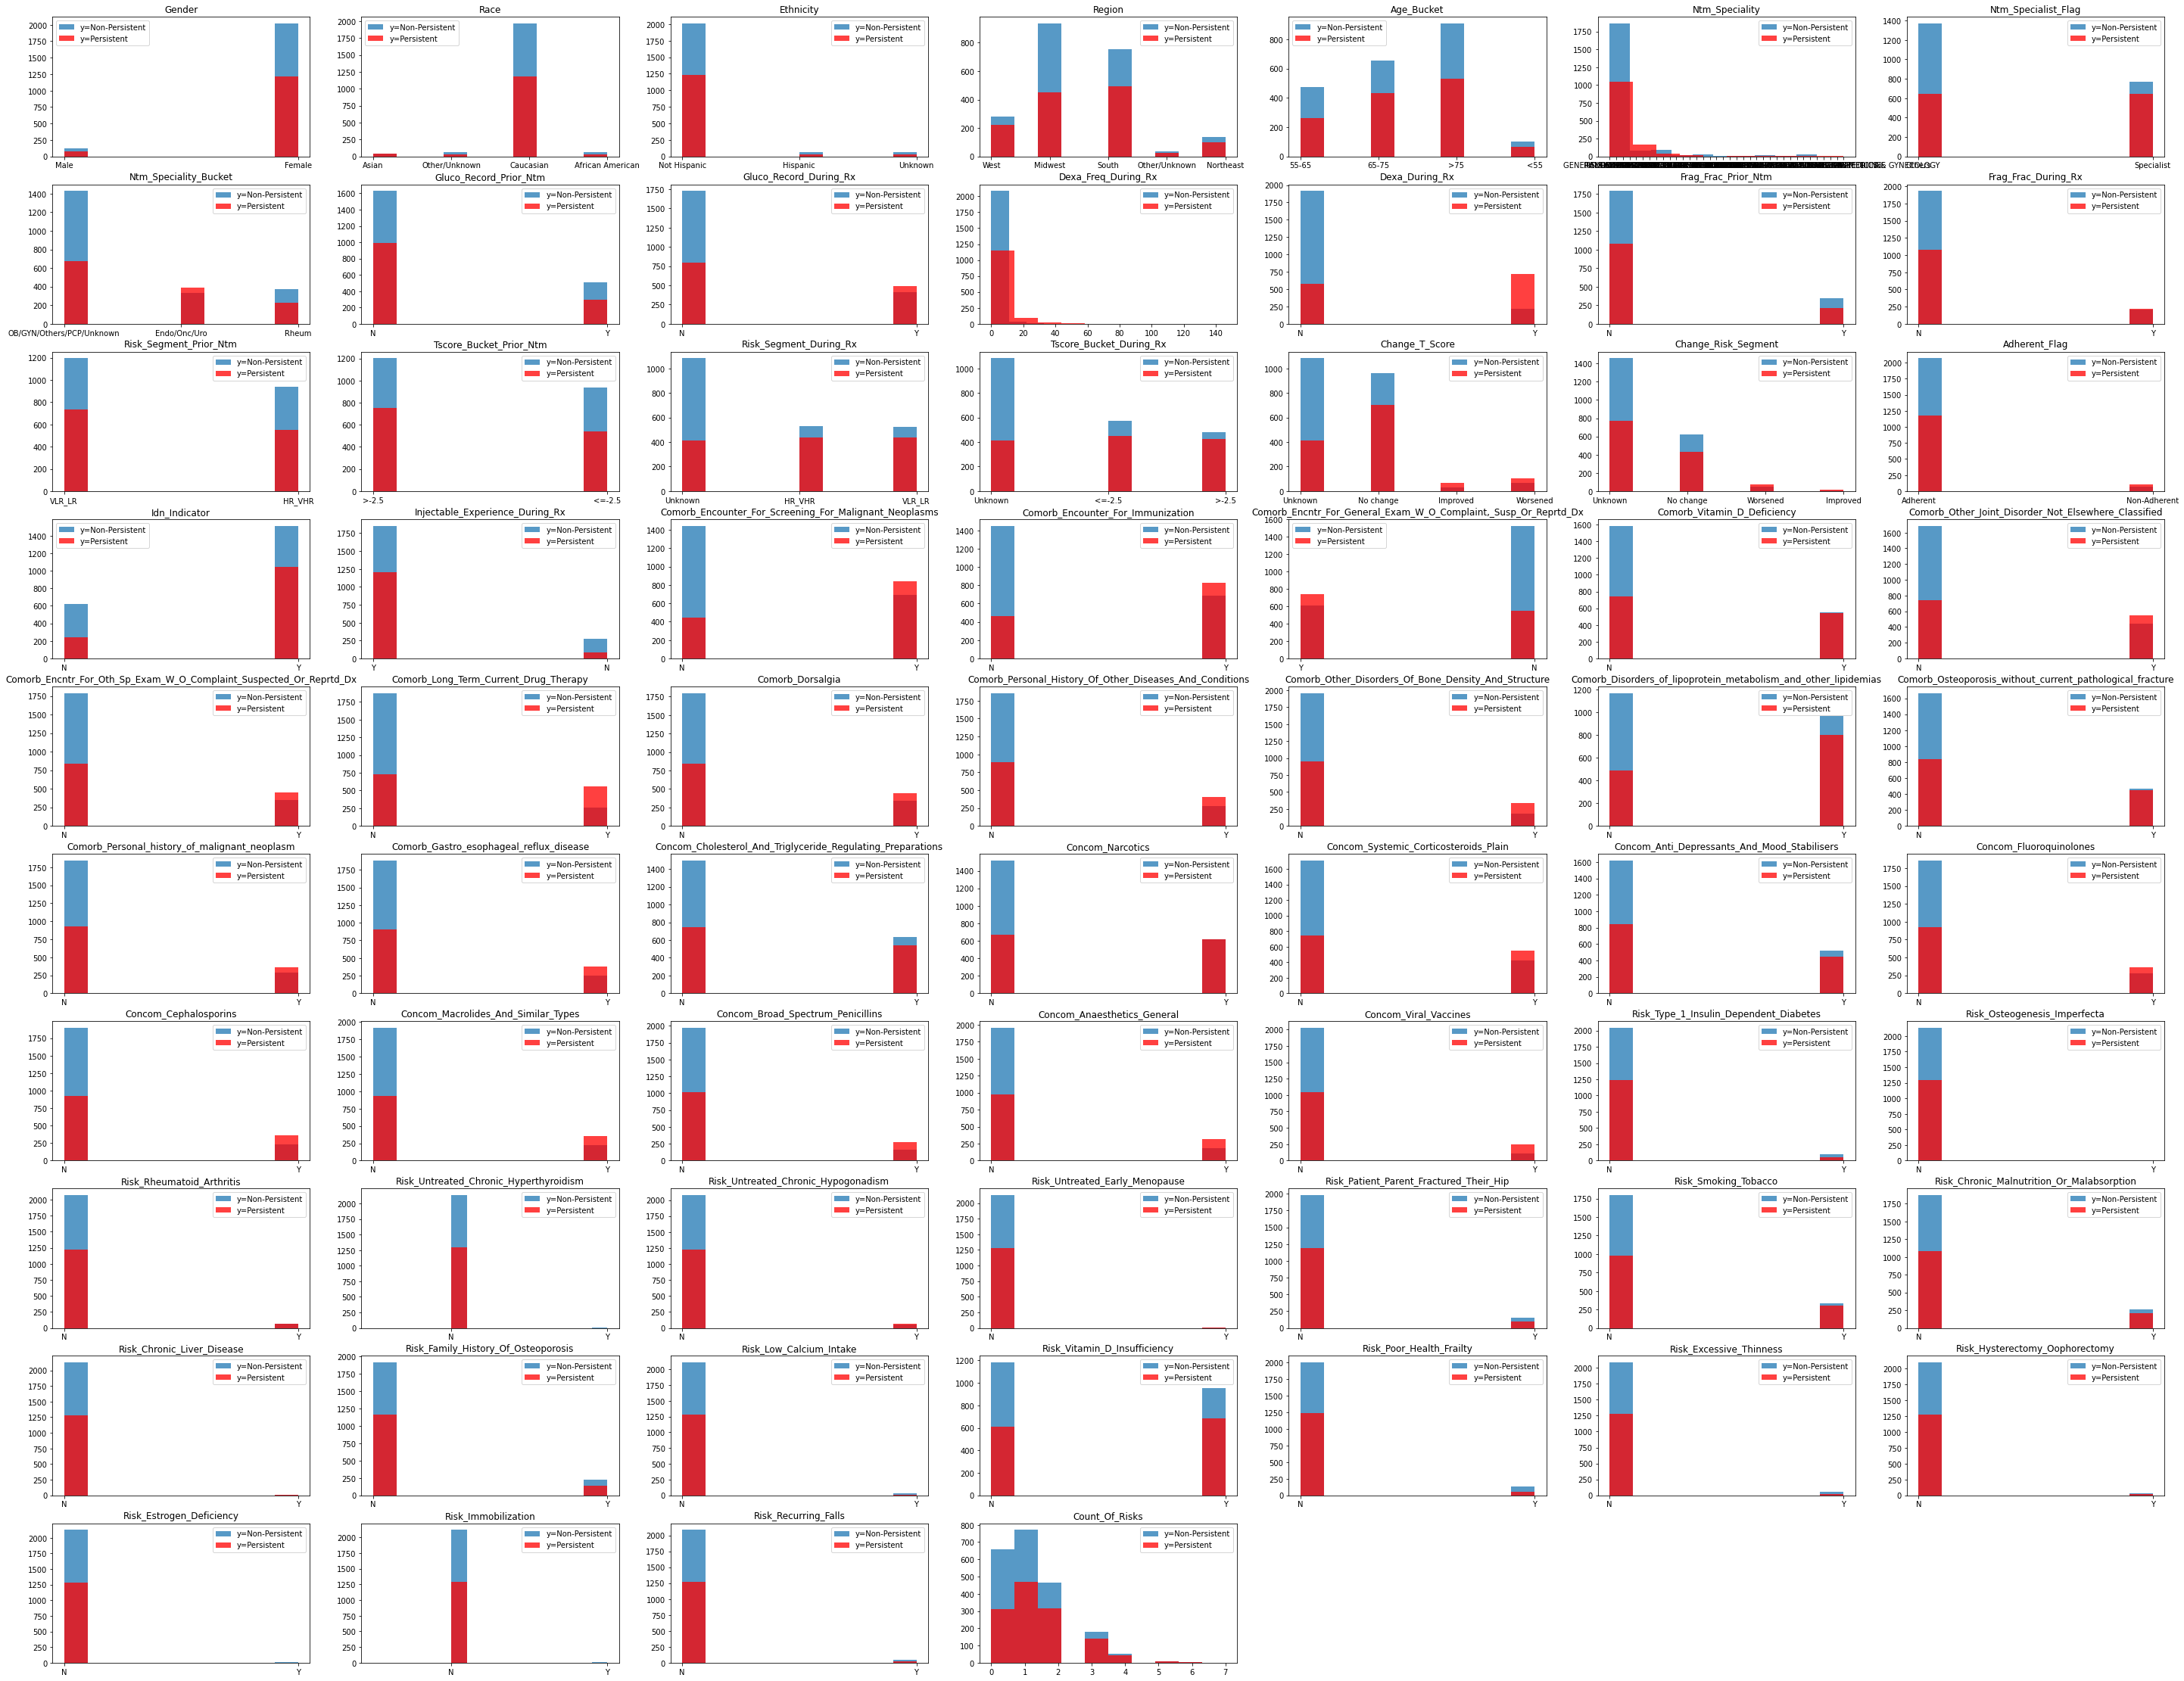

In [9]:
# histogram for each class
import matplotlib.pyplot as plt

plt.figure(figsize=(50,40))

idx_0 =  data['Persistency_Flag'] == 'Non-Persistent'
idx_1 =  data['Persistency_Flag'] == 'Persistent'	

# your code here
for i,feature in enumerate(data.columns.drop(['Persistency_Flag','Ptid'])):
    plt.subplot(10,7,i+1)   
    plt.hist(data.loc[idx_0,feature],density=0, alpha=0.75,label='y=Non-Persistent')
    plt.hist(data.loc[idx_1,feature],density=0, facecolor='red', alpha=0.75,label='y=Persistent')
    plt.legend()
    plt.title(feature)

plt.show()

Some interpretation:

*   more than 60% of females and males are flagged as non-persistent.which tells us both genders are experiencing the results from the drug when it comes to the persistency


*   There seem to be some remarkable differences between Asian and other races. They are probably due to cultural factors and other behaviours.


*   The distribution of Dexa_Freq_During_Rx numbers seems to be higher in the Persistent patients


*   the age bucket >75 have the highest non-persistent patients


*   We can see that most of the patients already hold comorbility factors, while holding risk factors is less common
*   The main comorbility factor is related to lipoproteins and metabolism (cholesterol)


*   The main risk factor is deficiency in vitamin D
*  most of our sample hold at least one risk, comorbidity and/or concomitant factor









# **data cleaning**

In [10]:
print("Missing values distribution: ")
print(data.isnull().sum())


Missing values distribution: 
Ptid                              0
Persistency_Flag                  0
Gender                            0
Race                              0
Ethnicity                         0
                                 ..
Risk_Hysterectomy_Oophorectomy    0
Risk_Estrogen_Deficiency          0
Risk_Immobilization               0
Risk_Recurring_Falls              0
Count_Of_Risks                    0
Length: 69, dtype: int64


In [11]:
print("Nan values distribution: ")
print(data.isna().sum())


Nan values distribution: 
Ptid                              0
Persistency_Flag                  0
Gender                            0
Race                              0
Ethnicity                         0
                                 ..
Risk_Hysterectomy_Oophorectomy    0
Risk_Estrogen_Deficiency          0
Risk_Immobilization               0
Risk_Recurring_Falls              0
Count_Of_Risks                    0
Length: 69, dtype: int64


In [12]:
print("Number of duplicates in dataframe")
print(len(data)-len(data.drop_duplicates()))

Number of duplicates in dataframe
0


# **Feature Engineering**

In [13]:
from sklearn.preprocessing import LabelEncoder
data= data.apply(LabelEncoder().fit_transform)

In [14]:
data

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,0,1,1,2,1,4,3,5,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1111,0,1,1,1,4,0,5,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2222,0,0,3,0,0,1,5,0,1,...,0,1,0,0,0,0,0,0,0,2
3,2758,0,0,2,1,0,3,5,0,1,...,0,0,0,0,0,0,0,0,0,1
4,2869,0,0,2,1,0,3,5,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3419,2691,1,0,2,1,3,3,5,0,1,...,0,0,1,0,0,0,0,0,0,1
3420,2692,1,0,2,1,3,3,34,0,1,...,0,0,0,0,0,0,0,0,0,0
3421,2693,1,0,2,1,3,3,3,1,0,...,0,0,1,0,0,0,0,0,0,1
3422,2694,0,0,2,1,3,0,34,0,1,...,0,0,0,0,0,0,0,0,0,0


In [15]:
x = data.drop(columns='Persistency_Flag')
y = data['Persistency_Flag']

In [16]:
x.head()

,Ptid,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,Gluco_Record_Prior_Ntm,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,0,1,2,1,4,3,5,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1111,1,1,1,4,0,5,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2222,0,3,0,0,1,5,0,1,0,...,0,1,0,0,0,0,0,0,0,2
3,2758,0,2,1,0,3,5,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,2869,0,2,1,0,3,5,0,1,1,...,0,0,0,0,0,0,0,0,0,1


In [17]:
y

0       1
1       0
2       0
3       0
4       0
       ..
3419    1
3420    1
3421    1
3422    0
3423    0
Name: Persistency_Flag, Length: 3424, dtype: int64

# **Model Development**

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
from matplotlib import pyplot
from sklearn.metrics import classification_report, confusion_matrix

In [19]:
x_train, x_test,y_train, y_test= train_test_split(x,y,test_size=0.2,random_state=42)

# **logistic regression**

In [20]:
from sklearn.model_selection import GridSearchCV

clf = LogisticRegression(solver='liblinear')
parameter_grid = {'C': [0.01, 0.1, 1, 2, 10, 100], 'penalty': ['l1', 'l2']}

In [21]:
#Gridsearch
gridsearch = GridSearchCV(clf, parameter_grid,scoring = 'accuracy')
gridsearch.fit(x_train,y_train)
gridsearch.best_params_


{'C': 100, 'penalty': 'l1'}

In [22]:
lr= gridsearch.best_estimator_

print("score on test: " + str(lr.score(x_test, y_test)))
print("score on train: "+ str(lr.score(x_train, y_train)))

score on test: 0.7970802919708029
score on train: 0.828039430449069


# **Support Vector Machine**

In [23]:
from sklearn.svm import SVC  


In [24]:
param_grid = {'C':[1,10,100],'kernel': ['rbf', 'poly', 'sigmoid']}
grid = GridSearchCV(SVC(),param_grid,scoring = 'accuracy')
grid.fit(x_train,y_train)
grid.best_params_

{'C': 100, 'kernel': 'poly'}

In [25]:
svm= grid.best_estimator_

print("score on test: " + str(svm.score(x_test, y_test)))
print("score on train: "+ str(svm.score(x_train, y_train)))

score on test: 0.7007299270072993
score on train: 0.7075575027382256


In [26]:
y_test_pred = svm.predict(x_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.69      0.96      0.80       431
           1       0.80      0.26      0.39       254

    accuracy                           0.70       685
   macro avg       0.74      0.61      0.59       685
weighted avg       0.73      0.70      0.65       685



# **Naive Bayes**

In [27]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB().fit(x_train, y_train)
print("score on test: " + str(mnb.score(x_test, y_test)))
print("score on train: "+ str(mnb.score(x_train, y_train)))

score on test: 0.745985401459854
score on train: 0.7575757575757576


In [28]:
y_test_pred = mnb.predict(x_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80       431
           1       0.67      0.63      0.65       254

    accuracy                           0.75       685
   macro avg       0.73      0.72      0.73       685
weighted avg       0.74      0.75      0.74       685



# **K-Nearest Neighbours**

In [29]:
from sklearn.neighbors import KNeighborsClassifier


In [30]:
parameters = {'n_neighbors':range(1, 80), 
              'weights':['uniform', 'distance']}
grid_search = GridSearchCV(estimator = KNeighborsClassifier(), 
                           param_grid = parameters, 
                           scoring = 'accuracy')
grid_search.fit(x_train, y_train)
grid_search.best_params_

{'n_neighbors': 2, 'weights': 'uniform'}

In [31]:
knn= grid_search.best_estimator_

print("score on test: " + str(knn.score(x_test, y_test)))
print("score on train: "+ str(knn.score(x_train, y_train)))

score on test: 0.6788321167883211
score on train: 0.8083242059145673


In [32]:
y_test_pred = knn.predict(x_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.68      0.92      0.78       431
           1       0.67      0.27      0.38       254

    accuracy                           0.68       685
   macro avg       0.67      0.59      0.58       685
weighted avg       0.68      0.68      0.63       685



# **Decision Tree**

In [33]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
print("score on test: "  + str(dtc.score(x_test, y_test)))
print("score on train: " + str(dtc.score(x_train, y_train)))

score on test: 0.7197080291970803
score on train: 1.0


decision tree visualization

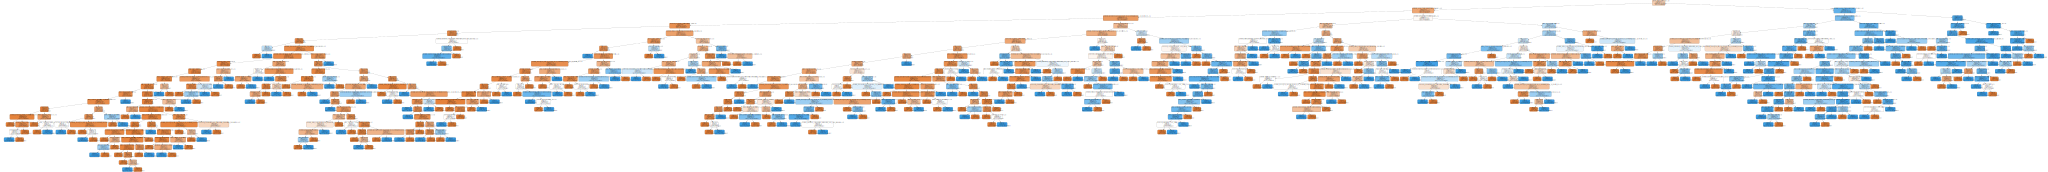

In [34]:
import graphviz
from sklearn.tree import export_graphviz

dot_data = export_graphviz(dtc, out_file=None, 
                         feature_names=x_train.columns,  
                         filled=True, rounded=True,  
                         special_characters=True,
                         class_names=['Persistent','Non-persistent'])
graph = graphviz.Source(dot_data) 

graph

In [35]:
y_test_pred = dtc.predict(x_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.80      0.74      0.77       431
           1       0.61      0.68      0.64       254

    accuracy                           0.72       685
   macro avg       0.70      0.71      0.71       685
weighted avg       0.73      0.72      0.72       685



# **Model Selection**

In [36]:
models = pd.DataFrame({
    'Model': [ 'logistic regression', 'Support Vector Machine','Naive Bayes','K-Nearest Neighbours','Decision Tree'],
    'Score': [lr.score(x_train, y_train), svm.score(x_train, y_train), mnb.score(x_train, y_train),knn.score(x_train, y_train),dtc.score(x_train, y_train)],
    'Test Score': [lr.score(x_test, y_test), svm.score(x_test, y_test),mnb.score(x_test,y_test),knn.score(x_test, y_test),dtc.score(x_test, y_test)]})
models.sort_values(by='Test Score', ascending=True)

,Model,Score,Test Score
3,K-Nearest Neighbours,0.808324,0.678832
1,Support Vector Machine,0.707558,0.700730
4,Decision Tree,1.000000,0.719708
2,Naive Bayes,0.757576,0.745985
0,logistic regression,0.828039,0.797080


# **Model Evaluation**

In [37]:
y_test_pred = lr.predict(x_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       431
           1       0.75      0.69      0.71       254

    accuracy                           0.80       685
   macro avg       0.78      0.77      0.78       685
weighted avg       0.79      0.80      0.80       685



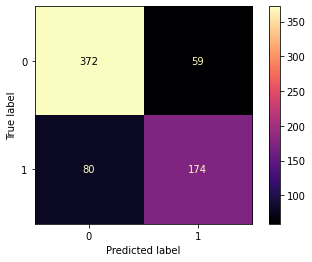

In [38]:
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns
sns.reset_orig()

ConfusionMatrixDisplay.from_predictions(
    y_test, y_test_pred,
    labels = lr.classes_,
    cmap = 'magma'
);

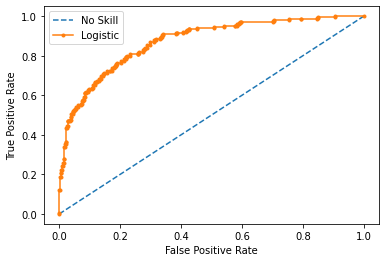

In [39]:
yhat = lr.predict_proba(x_test)
pos_probs = yhat[:, 1]
pyplot.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
fpr, tpr, _ = roc_curve(y_test, pos_probs)
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()